# Outliers Detection
Outliers detection in a dataset involves the discovery of items with an abnormal behaviour. Outliers detection can be considered as a preprocessing technique, as well as missing values detection, normalisation, standardisation, data formatting, data binning and dropping duplicates.
A very quick introduction to outliers detection can be found in [this interesting article](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561) by Sergio Santoyo.

Different techniques exist for outliers detection:
* **Extreme Value Analysis**: this approach assumes that values which are too large or too small are outliers. This technique includes Z-test and Student’s t-test;
* **Probabilistic and Statistical Models**: these approaches assume specific distributions for data.Outliers are the points with low probability;
* **Linear Models**: these approaches exploits the distance of each data point from a specific plane to find outliers. These techniques include PCA (Principal Component Analysis);
* **Proximity-based Models**: in these models outliers as points which are isolated from rest of observations. These techniques include Cluster analysis, density based analysis and nearest neighborhood;
* **Information Theoretic Models**: in these models outliers increase the minimum code length to describe a data set;
* **High-Dimensional Outlier Detection**: these models implement specifc methods to handle high dimensional sparse data.

In this tutorial, I exploit the `pyod` Python library, which supports the following outliers detection techniques:
* Proximity-Based
* Linear
* Probabilistic
* Outlier Ensembles
* Neural Networks.

The full documentation of the `pyod` library can be found a [this link](https://pyod.readthedocs.io/en/latest/). In this tutorial, I focus only on the first three techniques.

## Build the dataset
Firstly, I build the dataset from scratch: I build a sinusoidal wave and then I perturbate it by manually adding three outliers. I exploit the `sin()` function of the `numpy` library to build the sinusoidal wave.

In [ ]:
import numpy as np

X = np.arange(0,100)
Y = np.sin(50*X)

Before perturbating the wave, I plot it through the `matplotlib` library.

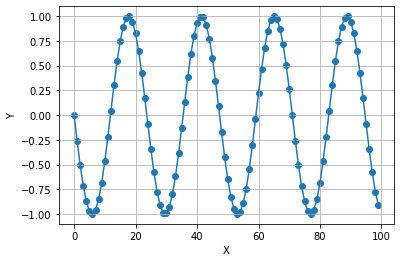

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Now I perturbate the sinusoidal wave, by modifing some Y values. Finally, I have 3 outliers.

In [ ]:
Y[5] = 1.25
Y[60] = -2
Y[85] = 1.4
n_outliers = 3

I plot the wave after the perturbation. The presence of the 3 outliers is clear.

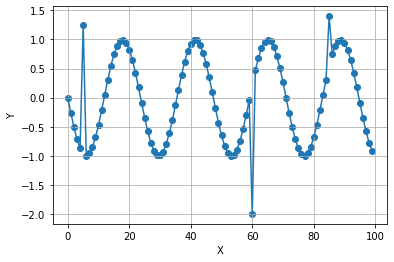

In [ ]:
plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Proximity-based models
These models consider outliers as points which are isolated from rest of observations. The main proximity-based models include:
* cluster analysis
* density based analysis
* nearest neighborhood.

The `pyod` library implements the following algorithms: 
* LOF (Local Outlier Factor)
* COF (Connectivity-Based Outlier Factor
* CBLOF (Clustering-Based Local Outlier Factor)
* LOCI (Local Correlation Integral)
* HBOS (Histogram-based Outlier Score)
* kNN (k Nearest Neighbors) 
* AvgKNN (Average kNN )
* MedKNN (Median kNN)
* SOD (Subspace Outlier Detection)
* ROD (Rotation-based Outlier Detection)

In this tutorial I exploit the `KNN` model. Firstly, I reshape the `Y` data into format which can be given as input to the `KNN()` model. Then, I build the `KNN` model and I fit it with `Y`. Finally, I predict the outliers through the `predict()` function. 

In [ ]:
!pip install pyod  

     |████████████████████████████████| 112kB 6.7MB/s 
  Created wheel for pyod: filename=pyod-0.8.8-cp37-none-any.whl size=116967 sha256=835b883e30800da15605525d92ac2bc9375d0b2d493aa4fee12fdf28a22b0849
  Stored in directory: /root/.cache/pip/wheels/54/dd/36/a12fa930455b7c38902f2dbf737175421ad30436e47ac5b24d
Successfully built pyod


In [ ]:
from pyod.models.knn import KNN

Y = Y.reshape(-1, 1)
clf = KNN()
clf.fit(Y)

outliers = clf.predict(Y)

The `outliers` variable is an array, which contains `1` if the corresponding value in `Y` is an outlier, `0`, otherwise. Thus I can calculate the position of outliers through the `numpy` function called `where()`. In this example, the algorithm detects outliers, correctly.

In [ ]:
np.where(outliers==1)

(array([ 5, 60, 85]),)

I plot results. Firstly I calculate `Y_outliers` and `X_outliers`, as well as `Y_inliers` and `X_inliers`.

In [ ]:
Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

Then, I draw a scatter plot.

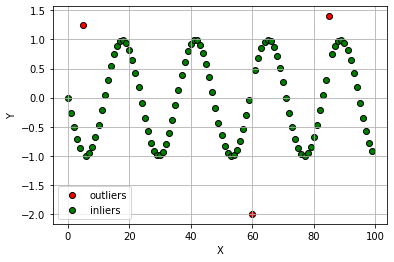

In [ ]:
plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Every outliers detection algorithm calculates an anomaly score, for each data point. The larger the anomaly score of a data point, the highest the probability that the data point is an outlier. I calculate the anomaly score through the `decision_function()`.

In [ ]:
anomaly_score = clf.decision_function(Y) 

I plot a histogram, which shows anomaly score and a vertical line which shows the minimum anomaly score used by the algorithm to detect an outlier.

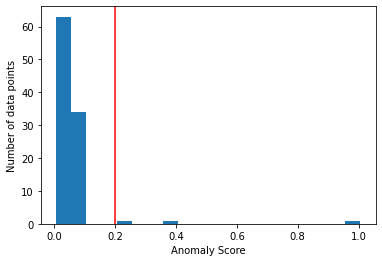

In [ ]:
n_bins=20
min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10
plt.hist(anomaly_score, bins=n_bins)
plt.axvline(min_outlier_anomaly_score, c='r')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of data points')
plt.show()

I can define manually the outliers. For example, I can consider outliers all the data points with an anomaly score greater than 0.3. In this specific case the manual definition does not work well, but in other cases, it can be useful.

In [ ]:
raw_outliers = np.where(anomaly_score >= 0.2)
raw_outliers

(array([ 5, 60, 85]),)

## Generalize to other models
The described procedure can be generalized also to the other approaches. In order to avoid to repeat the code, I define a function, called `outliers_detection()` which receives as input the outlier model and its name. The function calculates exactly what I have calculated for the `KNN` model.

In [ ]:
def outliers_detection(model, name):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]
    print(X_outliers)
    
    
    plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
    plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    
    anomaly_score = clf.decision_function(Y)
    min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10
    plt.hist(anomaly_score, bins=n_bins)
    plt.axvline(min_outlier_anomaly_score, c='r')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of data points')
    plt.show()
    return anomaly_score

# Linear Models
The `pyod` library implements the following linear models:
* PCA (Principal Component Analysis)
* MCD (Minimum Covariance Determinant)
* OCSVM (One-Class Support Vector Machines)
* LMDD (Deviation-based Outlier Detection).

In this example, I use the `OCSVM` model. Firstly, I build the model and then I call the `outliers_detection()` function.

[ 5  6 29 30 53 54 60 65 77 85]


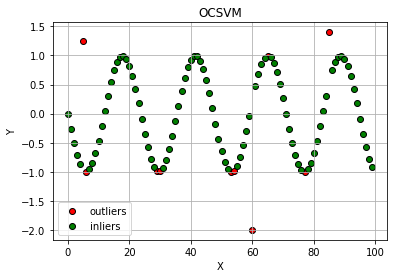

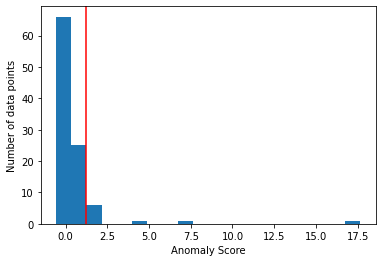

In [ ]:
from pyod.models.ocsvm import OCSVM
model = OCSVM()
anomaly_score = outliers_detection(model, 'OCSVM')

This model over estimates the number of outliers. Thus, manually I can define the outliers. From the previous histogram, I can see, for example, that outliers could be all the data points with an anomaly score greater than 2.5

In [ ]:
raw_outliers = np.where(anomaly_score >= 2.5)
raw_outliers

(array([ 5, 60, 85]),)

In this case, the algorithm recognizes correctly the outliers. 

Alternatively, when I build the model, I can specify the  percentage of outliers to detect, provided that I know in advance the number of outliers. This can be done by setting the `contamination` parameter.

[ 5 60 85]


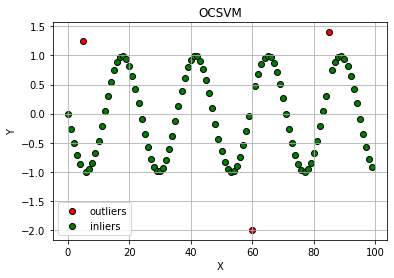

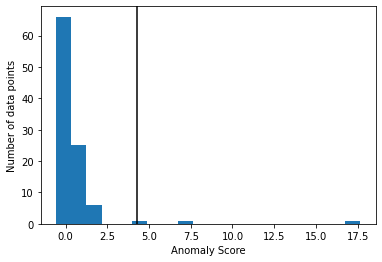

In [ ]:
model = OCSVM(contamination=n_outliers/len(Y))
anomaly_score = outliers_detection(model, 'OCSVM')

## Probabilistic models
The `pyod` library implements the following probabilistic models:
* ABOD (Angle-Based Outlier Detection)
* FastABOD (Fast Angle-Based Outlier Detection)
* COPOD (Copula-Based Outlier Detection)
* MAD (Median Absolute Deviation)
* SOS (Stochastic Outlier Selection).

In the following example, I focus on the `ABOD` model. Similarly, to the `OCSVM` model, the `ABOD` model over estimates the number of outliers.

[ 6 29 30 53 54 60 76 77 78]


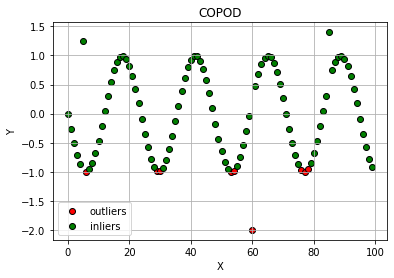

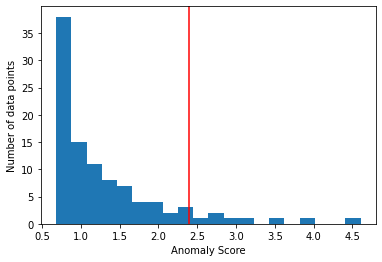

In [ ]:
from pyod.models.copod import COPOD 
    
model = COPOD()
anomaly_score = outliers_detection(model, 'COPOD')

In this case, the list of identified outliers does not contain any of the actual outliers. Thus this algorithm should not be used in this specific example.